In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [33]:
path = "/Users/jakubdziedzic/Desktop/National University of Singapore/Predictive Analytics in Business/Project"
os.chdir(path)
print(os.getcwd())

/Users/jakubdziedzic/Desktop/National University of Singapore/Predictive Analytics in Business/Project


In [35]:
df = pd.read_csv('flights_final.csv')

In [37]:
# Create a subset
# Randomly sample 1/6th of the data
sub_df = df.sample(frac=1/6, random_state=0).reset_index(drop=True)
print(sub_df.shape)

(969846, 31)


In [39]:
pd.set_option('display.max_columns', None)
print(sub_df.head())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      4   17            5      EV           4398      N21129   
1  2015     11   15            7      AA            494      N922US   
2  2015     12   21            1      OO           5550      N765SK   
3  2015     11   12            4      VX            770      N529VA   
4  2015      1   26            1      DL           1136      N658DL   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            CLE                 DCA                 2109          2106.0   
1            RSW                 CLT                 1310          1305.0   
2            XNA                 SFO                  745          1018.0   
3            DAL                 LGA                 1645          1645.0   
4            ATL                 RSW                 1340          1337.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0             -3.0      11.0      21

In [41]:
sub_df = sub_df.drop(['YEAR', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print(sub_df.head(2)) 

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      4   17            5      EV           4398            CLE   
1     11   15            7      AA            494            RSW   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 DCA                 2109             -3.0            82.0   
1                 CLT                 1310             -5.0           115.0   

   DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
0       310               2231          -18.0          0  
1       600               1505          -15.0          0  


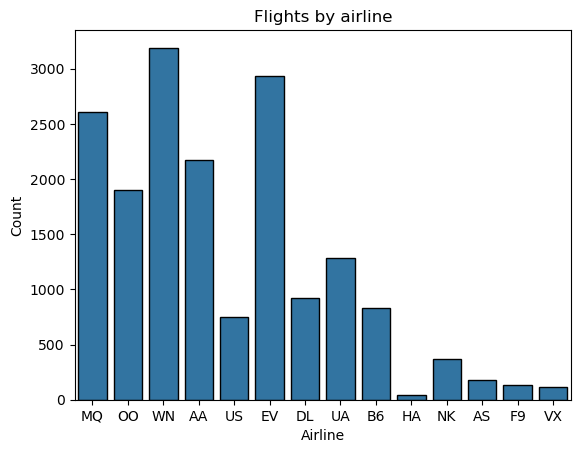

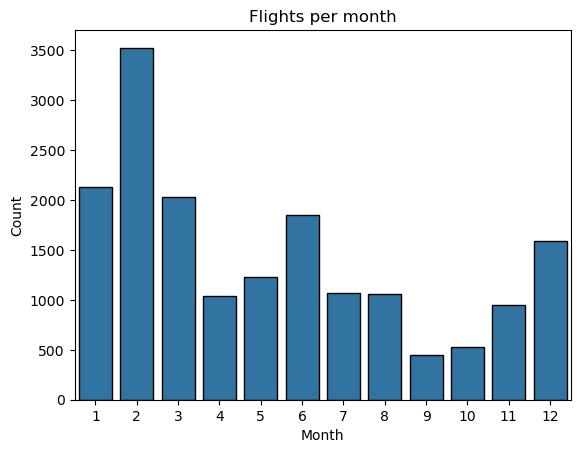

    MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
23      4   14            2      MQ           3011            MEM   
30      6    7            7      OO           6346            MRY   
36      4   17            5      WN            368            STL   

   DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
23                 MIA                  544            252.0           141.0   
30                 SFO                  650              NaN            45.0   
36                 DEN                 1505              NaN           145.0   

    DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
23       859                905            NaN          1  
30        77                735            NaN          1  
36       770               1630            NaN          1  
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_

In [43]:
sub_df_1 = sub_df[sub_df['ARRIVAL_DELAY'].isna()]

sns.countplot(data=sub_df_1, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

sns.countplot(data=sub_df_1, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

print(sub_df_1.head(3)) 

# na in ARRIVAL_DELAY and DEPARTURE_DELAY will be dropped as they regard cancelled flights

sub_df_2 = sub_df[sub_df['CANCELLED'] != 1]
sub_df_2 = sub_df_2.dropna(subset=['ARRIVAL_DELAY'])
print(sub_df_2.isnull().sum())

In [45]:
# Binary variable for 'Flight_delayed'
sub_df_2['departure_delayed'] = sub_df_2['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
sub_df_2['arrival_delayed'] = sub_df_2['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
print(sub_df_2.head(10))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      4   17            5      EV           4398            CLE   
1     11   15            7      AA            494            RSW   
2     12   21            1      OO           5550            XNA   
3     11   12            4      VX            770            DAL   
4      1   26            1      DL           1136            ATL   
5      9    2            3      AA            251            MIA   
6      1   16            5      AA           1449            MIA   
7      6   24            3      DL           1720            MSP   
8      8   21            5      EV           5044            MSP   
9     10   27            2      MQ           3448            ORD   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 DCA                 2109             -3.0            82.0   
1                 CLT                 1310             -5.0           115.0   
2             

In [47]:
# Counting number of occurences grouped by Month and Day
def assign_flight_counts(sub_df_2):
    # Deaprtures
    departure_counts = sub_df_2.groupby(['MONTH', 'DAY', 'ORIGIN_AIRPORT']).size().reset_index(name='NUM_DEPARTURES')

    # Arrivals
    arrival_counts = sub_df_2.groupby(['MONTH', 'DAY', 'DESTINATION_AIRPORT']).size().reset_index(name='NUM_ARRIVALS')

    # Merging back to original dataframe (Departures)
    sub_df_2 = pd.merge(sub_df_2, departure_counts, how='left', on=['MONTH', 'DAY', 'ORIGIN_AIRPORT'])

    # Merging back to original dataframe (Arrivals)
    sub_df_2 = pd.merge(sub_df_2, arrival_counts, how='left', on=['MONTH', 'DAY', 'DESTINATION_AIRPORT'])

    return sub_df_2

sub_df_3 = assign_flight_counts(sub_df_2)

# Reordering columns
cols = sub_df_3.columns.tolist()  # Get the current column order as a list

# Getting index of origin and destination airport for location
origin_index = cols.index('ORIGIN_AIRPORT')
destination_index = cols.index('DESTINATION_AIRPORT')

# Removing duplicated
cols = [col for col in cols if col not in ['NUM_DEPARTURES', 'NUM_ARRIVALS']]

# Insert 'num_departures' after 'ORIGIN_AIRPORT'
cols.insert(origin_index + 1, 'NUM_DEPARTURES') # +1 for correct location

# Insert 'num_arrivals' after 'DESTINATION_AIRPORT'
cols.insert(destination_index + 2, 'NUM_ARRIVALS') # +2 for correct location

sub_df_3 = sub_df_3[cols]

print(sub_df_3.head(3))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      4   17            5      EV           4398            CLE   
1     11   15            7      AA            494            RSW   
2     12   21            1      OO           5550            XNA   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              13                 DCA            39                 2109   
1              21                 CLT            51                 1310   
2               3                 SFO            64                  745   

   DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
0             -3.0            82.0       310               2231   
1             -5.0           115.0       600               1505   
2            153.0           245.0      1550                950   

   ARRIVAL_DELAY  CANCELLED  departure_delayed  arrival_delayed  
0          -18.0          0                  0                0  
1          -15.0     

In [49]:
def calculate_day_of_year(row):
    date = datetime.datetime(year=2015, month=row['MONTH'], day=row['DAY'])  
    return date.timetuple().tm_yday  

sub_df_3['DAY_OF_YEAR'] = sub_df_3.apply(calculate_day_of_year, axis=1)

In [51]:
print(sub_df_3.head(6))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      4   17            5      EV           4398            CLE   
1     11   15            7      AA            494            RSW   
2     12   21            1      OO           5550            XNA   
3     11   12            4      VX            770            DAL   
4      1   26            1      DL           1136            ATL   
5      9    2            3      AA            251            MIA   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              13                 DCA            39                 2109   
1              21                 CLT            51                 1310   
2               3                 SFO            64                  745   
3              39                 LGA            48                 1645   
4             156                 RSW            18                 1340   
5              35                 TPA            28                

In [53]:
# Perform one-hot encoding
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_encoded = pd.get_dummies(sub_df_3, columns=categorical_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.head(6))

(952405, 671)
   MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  NUM_DEPARTURES  NUM_ARRIVALS  \
0      4   17            5           4398              13            39   
1     11   15            7            494              21            51   
2     12   21            1           5550               3            64   
3     11   12            4            770              39            48   
4      1   26            1           1136             156            18   
5      9    2            3            251              35            28   

   SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
0                 2109             -3.0            82.0       310   
1                 1310             -5.0           115.0       600   
2                  745            153.0           245.0      1550   
3                 1645              0.0           190.0      1381   
4                 1340             -3.0           102.0       515   
5                 1700              0.0       

In [56]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X_dep_del = df_encoded.drop(columns=['DEPARTURE_DELAY', 'departure_delayed'])  # Features
y_dep_del = df_encoded['DEPARTURE_DELAY']  # Target variable

# Split data
X_train_dep_del, X_test_dep_del, y_train_dep_del, y_test_dep_del = train_test_split(X_dep_del, y_dep_del, test_size=0.3, random_state=0)

# Initialize the model
gb_reg_dep_del = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

# Fit the model
gb_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_dep_del = gb_reg_dep_del.predict(X_test_dep_del)

# Evaluate
mse_dep_del = mean_squared_error(y_test_dep_del, y_pred_dep_del)
rmse_dep_del = np.sqrt(mse_dep_del)
r2_dep_del = r2_score(y_test_dep_del, y_pred_dep_del)

# Print evaluation metrics
print(f"Gradient Boosting RMSE for 'departure_delay': {rmse_dep_del}")
print(f"Gradient Boosting R² Score for 'departure_delay': {r2_dep_del}")

Gradient Boosting RMSE for 'departure_delay': 9.553318258109869
Gradient Boosting R² Score for 'departure_delay': 0.9309385184589462


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#GB Cross-Validation
cv_scores_gb = cross_val_score(gb_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print("Gradient Boosting Regressor Cross-Validation R^2 Scores:", cv_scores_gb)
print("Average Cross-Validation R^2 Score for Gradient Boosting:", cv_scores_gb.mean())

Gradient Boosting Regressor Cross-Validation R^2 Scores: [0.93127496 0.93178895 0.93181741 0.93286175 0.93039907]
Average Cross-Validation R^2 Score for Gradient Boosting: 0.9316284286165795


In [58]:
#KNN 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor
knn_reg_dep_del = KNeighborsRegressor(n_neighbors=5)
# Fit the model

knn_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_knn_dep_del = knn_reg_dep_del.predict(X_test_dep_del)

# Evaluate the model
mse_knn_dep_del = mean_squared_error(y_test_dep_del, y_pred_knn_dep_del)
rmse_knn_dep_del = np.sqrt(mse_knn_dep_del)
r2_knn_dep_del = r2_score(y_test_dep_del, y_pred_knn_dep_del)

# Print evaluation metrics
print(f"KNN RMSE for 'departure_delay': {rmse_knn_dep_del}")
print(f"KNN R² Score for 'departure_delay': {r2_knn_dep_del}")

KNN RMSE for 'departure_delay': 21.52796547611888
KNN R² Score for 'departure_delay': 0.649301930390537


In [59]:
#KNN Cross-Validation

cv_scores_knn = cross_val_score(knn_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print("KNN Regressor Cross-Validation R^2 Scores:", cv_scores_knn)
print("Average Cross-Validation R^2 Score for KNN:", cv_scores_knn.mean())

KNN Regressor Cross-Validation R^2 Scores: [0.66468665 0.66466593 0.66511488 0.6668618  0.66567744]
Average Cross-Validation R^2 Score for KNN: 0.6654013405365966


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize
dt_reg_dep_del = DecisionTreeRegressor(max_depth=10, random_state=0)

# Fit the model
dt_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_dt_dep_del = dt_reg_dep_del.predict(X_test_dep_del)

# Evaluate
mse_dt_dep_del = mean_squared_error(y_test_dep_del, y_pred_dt_dep_del)
rmse_dt_dep_del = np.sqrt(mse_dt_dep_del)
r2_dt_dep_del = r2_score(y_test_dep_del, y_pred_dt_dep_del)

# Print evaluation metrics
print(f"Decision Tree RMSE for 'departure_delay': {rmse_dt_dep_del}")
print(f"Decision Tree R² Score for 'departure_delay': {r2_dt_dep_del}")

Decision Tree RMSE for 'departure_delay': 9.898711755086506
Decision Tree R² Score for 'departure_delay': 0.9258545074041475


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_reg_dep_del = DecisionTreeRegressor(max_depth=10, random_state=0)

# Perform 5-fold cross-validation
cv_scores_dt = cross_val_score(dt_reg_dep_del, X_dep_del, y_dep_del, cv=5, scoring='r2')

# Print the cross-validation scores and their mean
print("Decision Tree Regressor Cross-Validation R^2 Scores:", cv_scores_dt)
print("Average Cross-Validation R^2 Score for Decision Tree:", cv_scores_dt.mean())

Decision Tree Regressor Cross-Validation R^2 Scores: [0.92668644 0.92715388 0.92745432 0.92776207 0.92531208]
Average Cross-Validation R^2 Score for Decision Tree: 0.9268737584757447
